In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("white")

# Titanic - Predicting Survival

## 0. Load and inspect

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1. Cleaning

### Missing values 

In [6]:
df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F2             3
              ..
B38            1
C148           1
C32            1
B73            1
B80            1
Name: Cabin, Length: 147, dtype: int64

We drop `Cabin` due to more than 75% missing values

In [8]:
df = df.drop(columns="Cabin")

Handle missing values for `Age` based on other variables

In [9]:
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Model `Age` as a function of Pclass, Sex, Fare

In [10]:
age = df.copy()

In [11]:
age = age[~age["Age"].isna()].reset_index(drop=True)

In [12]:
age = pd.get_dummies(age, columns=["Pclass", "Sex"], drop_first=True)
age

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_2,Pclass_3,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,Q,0,1,0
710,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1,0,1
711,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0,0,0
712,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,0,0,1


In [13]:
import statsmodels.api as sm

age_X = age[["Fare", "Pclass_2","Pclass_3", "Sex_male"]]
age_X = sm.add_constant(age_X)
age_y = age[["Age"]]

In [14]:
age_lr = sm.OLS(age_y, age_X)
result = age_lr.fit()

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     38.63
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           2.86e-29
Time:                        10:11:38   Log-Likelihood:                -2852.9
No. Observations:                 714   AIC:                             5716.
Df Residuals:                     709   BIC:                             5739.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0647      1.583     25.310      0.000      36.957      43.173
Fare          -0.0456      0.012     -3.865      0.000      -0.069      -0.022
Pclass_2     -11.5068      1.598     -7.200      0.000     -14.645      -8.369
Pclass_3     -17.1841      1.481    -11.602      0.000     -20.092     -14.276
Sex_male       4.0181      1.050      3.827      0.000       1.957       6.080
==============================================================================
Omnibus:                       11.593   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.846
Skew:                           0.281   Prob(JB):                      0.00268
Kurtosis:                       3.285   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
age_predict = df[df["Age"].isna()].copy()

In [17]:
age_predict = pd.get_dummies(age_predict, columns=["Pclass", "Sex"], drop_first=True)

In [18]:
age_predict_X = age_predict[["Fare", "Pclass_2","Pclass_3", "Sex_male"]]
age_predict_X = sm.add_constant(age_predict_X)

In [19]:
result.predict(age_predict_X)

5      26.512788
17     31.982851
19     22.550978
26     26.569056
28     22.521130
         ...    
859    26.568864
863    19.707467
868    26.465261
878    26.538451
888    21.810730
Length: 177, dtype: float64

In [20]:
age_predict = age_predict.assign(predicted_age=result.predict(age_predict_X))

Put predicted_age back into df to impute the missing values

In [21]:
df.loc[df["Age"].isna(), "Age"] = result.predict(age_predict_X)

In [22]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Inspect `Embarked`

In [23]:
df[df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [24]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df.loc[df["Embarked"].isna(), "Embarked"] = "S"

In [26]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
df.replace("", np.nan).isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
df.replace(" ", np.nan).isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
df.replace("-", np.nan).isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 2. Feature Extraction and Engineering

Create a new feature `FamilySize` that is the sum of `SibSp` and `Parch`

In [30]:
df = df.assign(FamilySize=df["SibSp"] + df["Parch"])

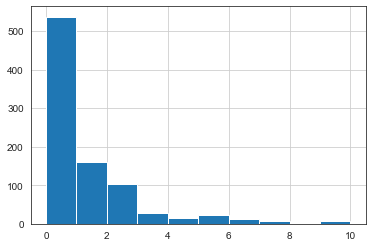

In [31]:
df["FamilySize"].hist()

In [32]:
df["FamilySize"].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamilySize, dtype: float64

Look at `Name`

In [33]:
df["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

Extract title

In [34]:
df["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[0].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Don               1
 Capt              1
 Sir               1
 the Countess      1
 Jonkheer          1
 Ms                1
 Lady              1
 Mme               1
Name: 0, dtype: int64

In [35]:
df = df.assign(Title=df["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[0])

In [36]:
df["Title"] = (df["Title"]
               .str.lstrip()
               .replace("Ms", "Miss")
               .replace("Mlle", "Miss")
               .replace("Mme", "Miss"))

In [37]:
df["Title"].value_counts()

Mr              517
Miss            186
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Jonkheer          1
the Countess      1
Lady              1
Capt              1
Don               1
Sir               1
Name: Title, dtype: int64

In [38]:
titles_to_rename = df["Title"].value_counts()[df["Title"].value_counts() < 10].index.to_list()

In [39]:
titles_to_rename

['Dr',
 'Rev',
 'Major',
 'Col',
 'Jonkheer',
 'the Countess',
 'Lady',
 'Capt',
 'Don',
 'Sir']

In [40]:
{col: "Other" for col in titles_to_rename}

{'Dr': 'Other',
 'Rev': 'Other',
 'Major': 'Other',
 'Col': 'Other',
 'Jonkheer': 'Other',
 'the Countess': 'Other',
 'Lady': 'Other',
 'Capt': 'Other',
 'Don': 'Other',
 'Sir': 'Other'}

In [41]:
df["Title"].replace({col: "Other" for col in titles_to_rename}).value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Other      23
Name: Title, dtype: int64

In [42]:
df["Title"] = df["Title"].replace({col: "Other" for col in titles_to_rename})

In [43]:
df = df.drop(columns="Name")

Drop `Ticket`

In [44]:
df = df.drop(columns="Ticket")

In [45]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr


# 3. Create dummy variables

In [46]:
df = pd.get_dummies(df,
                    columns=["Pclass", "Sex", "Embarked", "Title"])

In [47]:
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,22.00000,1,0,7.2500,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,2,1,38.00000,1,0,71.2833,1,1,0,0,1,0,1,0,0,0,0,0,1,0
2,3,1,26.00000,0,0,7.9250,0,0,0,1,1,0,0,0,1,0,1,0,0,0
3,4,1,35.00000,1,0,53.1000,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,5,0,35.00000,0,0,8.0500,0,0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,0,0,13.0000,0,0,1,0,0,1,0,0,1,0,0,0,0,1
887,888,1,19.00000,0,0,30.0000,0,1,0,0,1,0,0,0,1,0,1,0,0,0
888,889,0,21.81073,1,2,23.4500,3,0,0,1,1,0,0,0,1,0,1,0,0,0
889,890,1,26.00000,0,0,30.0000,0,1,0,0,0,1,1,0,0,0,0,1,0,0


# 4. Split dataset

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
passenger_id = ["PassengerId"]
response = ["Survived"]
num_cols = ["Age", "Fare"]
cat_cols = [col for col in df.columns if col not in passenger_id + response + num_cols]

In [50]:
train, test = train_test_split(df, test_size=.15, random_state=42)

In [107]:
train_y = train[response].values.ravel()
train_X = train[num_cols + cat_cols].reset_index(drop=True)
test_y = test[response].values.ravel()
test_X = test[num_cols + cat_cols].reset_index(drop=True)

In [84]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# 5. Create baseline

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(train_X, train_y)

In [86]:
model.predict(test_X)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1])

In [87]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(test_y, model.predict(test_X))

0.7685439560439561

# 6. 5-fold cross validation

In [88]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [89]:
np.random.seed(42)
cross_validate(DecisionTreeClassifier(),
               train_X,
               train_y,
               cv=5,
               scoring="balanced_accuracy")

{'fit_time': array([0.0065341 , 0.01476002, 0.00619817, 0.01754904, 0.00746393]),
 'score_time': array([0.00435376, 0.00572896, 0.0045948 , 0.00447297, 0.00230813]),
 'test_score': array([0.68672047, 0.75263158, 0.74636058, 0.80617768, 0.78863382])}

In [90]:
np.random.seed(42)
validation_scores = cross_validate(DecisionTreeClassifier(),
                                   train_X,
                                   train_y,
                                   cv=5,
                                   scoring="balanced_accuracy")

In [91]:
validation_scores["test_score"].mean()

0.7561048255267664

In [92]:
def validate_model(model, X, y, random_state=None):
    if random_state:
        np.random.seed(random_state)
    validation_scores = cross_validate(model,
                                       X,
                                       y,
                                       cv=5,
                                       scoring="balanced_accuracy")
    bmas = validation_scores["test_score"].mean()
    std = validation_scores["test_score"].std()
    print(f"Balanced Mean Accuracy Score: {round(bmas, 4)} ({round(std, 4)})")
    return bmas
    

In [93]:
validate_model(DecisionTreeClassifier(), train_X, train_y, 42)

Balanced Mean Accuracy Score: 0.7561 (0.0412)


0.7561048255267664

In [78]:
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}

In [94]:
for name, model in models.items():
    print(f"{name}:")
    validate_model(model, train_X, train_y.values.ravel(), 42)
    print("--------------------------\n")

Logistic Regression:
Balanced Mean Accuracy Score: 0.8092 (0.0242)
--------------------------

Decision Tree:
Balanced Mean Accuracy Score: 0.7561 (0.0412)
--------------------------

Random Forest:
Balanced Mean Accuracy Score: 0.7701 (0.0202)
--------------------------



In [101]:
def validate(models, X, y=train_y, random_state=42):
    for name, model in models.items():
        print(f"{name}:")
        validate_model(model, X, y, random_state)
        print("--------------------------\n")

## 7. Feature Selection

In [82]:
train

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
599,600,1,49.000000,1,0,56.9292,1,1,0,0,0,1,1,0,0,0,0,0,0,1
830,831,1,15.000000,1,0,14.4542,1,0,0,1,1,0,1,0,0,0,0,0,1,0
306,307,1,35.005803,0,0,110.8833,0,1,0,0,1,0,1,0,0,0,1,0,0,0
231,232,0,29.000000,0,0,7.7750,0,0,0,1,0,1,0,0,1,0,0,1,0,0
845,846,0,42.000000,0,0,7.5500,0,0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,21.000000,0,0,7.6500,0,0,0,1,1,0,0,0,1,0,1,0,0,0
270,271,0,42.668470,0,0,31.0000,0,1,0,0,0,1,0,0,1,0,0,1,0,0
860,861,0,41.000000,2,0,14.1083,2,0,0,1,0,1,0,0,1,0,0,1,0,0
435,436,1,14.000000,1,2,120.0000,3,1,0,0,1,0,0,0,1,0,1,0,0,0


### 7.1. Drop correlated features

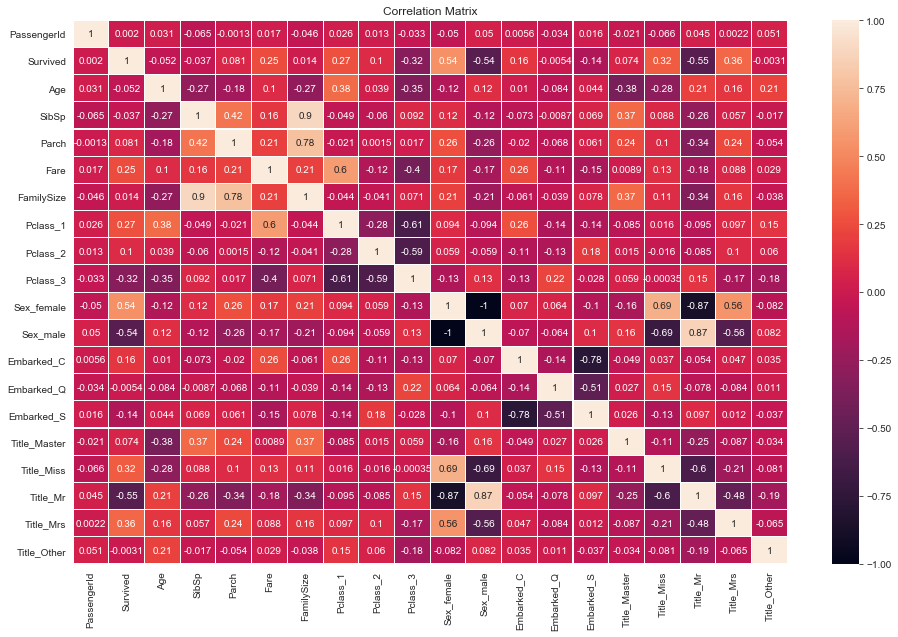

In [100]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(train.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

In [110]:
fs1_to_drop = ["SibSp", "Parch", "Pclass_3", "Title_Master", "Embarked_C", "Sex_male"]

train_X1 = train[num_cols + cat_cols].drop(columns=fs1_to_drop).reset_index()
train_y1 = train[response].values.ravel()

validate(models, train_X1, train_y1)

Logistic Regression:
Balanced Mean Accuracy Score: 0.8057 (0.0256)
--------------------------

Decision Tree:
Balanced Mean Accuracy Score: 0.7482 (0.0237)
--------------------------

Random Forest:
Balanced Mean Accuracy Score: 0.7889 (0.0215)
--------------------------



## 5.2. Recursive Feature Elimination - RFE

In [111]:
from sklearn.feature_selection import RFECV

In [112]:
np.random.seed(42)
selector_rf = RFECV(RandomForestClassifier(),
                    cv=5, 
                    scoring="balanced_accuracy")

In [113]:
selector_rf.fit(train_X, train_y);

In [114]:
selector_rf.get_support()

array([ True,  True, False, False,  True, False, False,  True,  True,
        True, False, False, False, False, False,  True, False, False])

In [116]:
train_X.columns

Index(['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other'],
      dtype='object')

In [118]:
train_X2 = train_X[train_X.columns[selector_rf.get_support()]]

In [121]:
validate(models, train_X2, train_y1)

Logistic Regression:
Balanced Mean Accuracy Score: 0.794 (0.0263)
--------------------------

Decision Tree:
Balanced Mean Accuracy Score: 0.7644 (0.0258)
--------------------------

Random Forest:
Balanced Mean Accuracy Score: 0.7839 (0.0229)
--------------------------



In [129]:
np.random.seed(42)
selector_lr = RFECV(LogisticRegression(max_iter=1000),
                    cv=5, 
                    scoring="balanced_accuracy")
selector_lr.fit(train_X, train_y1)

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000),
      scoring='balanced_accuracy')

In [130]:
train_X3 = train_X[train_X.columns[selector_lr.get_support()]]
validate(models, train_X3, train_y1)

Logistic Regression:
Balanced Mean Accuracy Score: 0.8092 (0.0242)
--------------------------

Decision Tree:
Balanced Mean Accuracy Score: 0.7561 (0.0412)
--------------------------

Random Forest:
Balanced Mean Accuracy Score: 0.7701 (0.0202)
--------------------------



In [126]:
selector_lr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## 8. Hyperparameter Tuning

Using GridSearch

1. Decision Tree

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid_dt = {"criterion": ["gini", "entropy"],
                 "min_samples_leaf": [1, 3, 5, 10],
                 "max_depth": [None, 2, 4, 8, 10]}

np.random.seed(42)
tune_dt = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid_dt,
                       cv=5,
                       scoring="balanced_accuracy")

In [133]:
tune_dt.fit(train_X, train_y1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'min_samples_leaf': [1, 3, 5, 10]},
             scoring='balanced_accuracy')

In [135]:
tune_dt.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}

In [136]:
# validate_model(DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=10))
validate_model(DecisionTreeClassifier(**tune_dt.best_params_),
               train_X,
               train_y1)

Balanced Mean Accuracy Score: 0.8001 (0.0282)


0.8000617832181334

2. Logistic Regression

In [139]:
param_grid_lr = {"penalty": ["l1", "l2", "elasticnet"],
                 "C": [0.1, 0.5, 1, 1.5, 2],
                 "solver": ["lbfgs", "liblinear", "newton-cg"],
                 "max_iter": [1000]}

np.random.seed(42)
tune_lr = GridSearchCV(LogisticRegression(),
                       param_grid=param_grid_lr,
                       cv=5,
                       scoring="balanced_accuracy")

In [140]:
tune_lr.fit(train_X, train_y1)

/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed.

/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit

/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/at/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 1.5, 2], 'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='balanced_accuracy')

In [141]:
tune_lr.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}

In [142]:
validate_model(LogisticRegression(**tune_lr.best_params_),
               train_X,
               train_y1)

Balanced Mean Accuracy Score: 0.8092 (0.0242)


0.8091509956108173

3. Random Forest

In [145]:
param_grid_rf = {"n_estimators": [100, 300],
                 "max_depth": [3, 4, 10, None],
                 "min_samples_leaf": [1,4,10],
                 "max_features": ["auto", "sqrt"],
                 "min_samples_split": [2, 5, 10]}

tune_rf = GridSearchCV(RandomForestClassifier(),
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring="balanced_accuracy")

In [146]:
tune_rf.fit(train_X2, train_y1)

KeyboardInterrupt: 

In [ ]:
tune_rf.best_params_

In [ ]:
validate_model(RandomForestClassifier(**tune_rf.best_params_), train_X2)

In [147]:
validate_model(RandomForestClassifier(bootstrap=True,
                                      max_depth=20,
                                      max_features="sqrt",
                                      min_samples_leaf=1,
                                      min_samples_split=5,
                                      n_estimators=1000),
               train_X2,
               train_y1)

Balanced Mean Accuracy Score: 0.7974 (0.0207)


0.7974026592526805

# 8. Test

In [149]:
model = LogisticRegression(**tune_lr.best_params_)
model.fit(train_X, train_y1)

pred = model.predict(test_X)
balanced_accuracy_score(test_y, pred)

0.8248626373626373

In [152]:
model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=20,
                                  max_features="sqrt",
                                  min_samples_leaf=1,
                                  min_samples_split=5,
                                  n_estimators=1000)
model_rf.fit(train_X2, train_y1)

test_X2 = test_X[test_X.columns[selector_rf.get_support()]]

pred_rf = model_rf.predict(test_X2)
balanced_accuracy_score(test_y, pred_rf)

0.8505036630036631

# 9. Train model

- Take your entire training dataset
- Train your candidate model
- Predict on test set
- Submit to Kaggle